# Learning and Intelligent Decision Making

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [16]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)
from typing import List


# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

# Actions
A = ['U', 'D', 'L', 'R']

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function
             
Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

num_states = len(S)
num_actions = len(A)

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [17]:
%matplotlib inline

def compute_mdp_optimal_q_function(
  s_states: List[str], 
  a_actions: List[str], 
  P_transitions: List[np.ndarray], 
  R_rewards: np.ndarray, 
  gamma_discount_factor: float, 
  tolerance: float = 1e-8,
  plot_graph: bool = False
) -> (np.ndarray, List[float]):
  """
  Calcula a função Q ótima para um dado MDP usando iteração de valor.

  Args:
    s_states (List[str]): Lista de estados (S).
    a_actions (List[str]): Lista de ações (A).
    P_transitions (List[np.ndarray]): Matrizes de probabilidade de transição (P).
    R_rewards (np.ndarray): Matriz de recompensa (R).
    gamma_discount_factor (float): Fator de desconto (γ).
    tolerance (float): Critério de parada para a iteração de valor.

  Returns:
    (np.ndarray, List[float]): Tupla contendo a função Q ótima (Q*) e a lista de erros por iteração.
  """
  # Obtém o número de estados do ambiente.
  n_states = len(s_states)
  # Obtém o número de ações possíveis.
  n_actions = len(a_actions)
  
  # Inicializa a função de valor V(s) com zeros para todos os estados.
  V_function = np.zeros((n_states, 1))
  
  # Define um erro inicial infinito para garantir que o loop de iteração de valor comece.
  delta_error = float('inf')
  # Lista para armazenar o erro a cada iteração.
  error_history = []

  # Inicia o loop de iteração de valor, que continua até que a convergência seja alcançada.
  while delta_error > tolerance:
    # Salva a função de valor da iteração anterior para calcular o erro de convergência.
    V_old_function = np.copy(V_function)
    # Inicializa uma matriz para armazenar os valores Q para a iteração atual.
    Q_values = np.zeros((n_states, n_actions))
    
    # Itera sobre cada ação para calcular os valores Q correspondentes.
    for a_index in range(n_actions):
      # Obtém o vetor de recompensas para a ação atual.
      R_for_action = R_rewards[:, a_index]
      # Obtém a matriz de transição de probabilidade para a ação atual.
      P_for_action = P_transitions[a_index]
      # Calcula o valor esperado futuro descontado, usando a função de valor da iteração anterior.
      E_future_value = gamma_discount_factor * P_for_action.dot(V_old_function).flatten()
      # Calcula os valores Q para a ação atual somando a recompensa imediata e o valor futuro esperado.
      Q_values[:, a_index] = R_for_action + E_future_value
        
    # Atualiza a função de valor para cada estado, escolhendo o valor Q máximo entre todas as ações.
    V_function = np.max(Q_values, axis=1).reshape(-1, 1)
    
    # Calcula o erro máximo absoluto entre a função de valor nova e a antiga para verificar a convergência.
    delta_error = np.max(np.abs(V_function - V_old_function))
    # Adiciona o erro atual ao histórico.
    error_history.append(delta_error)

  # Após a convergência da função de valor, calcula a função Q ótima final.
  Q_optimal_function = np.zeros((n_states, n_actions))
  # Itera sobre cada ação para calcular os valores Q ótimos.
  for a_index in range(n_actions):
    # Obtém o vetor de recompensas para a ação atual.
    R_for_action = R_rewards[:, a_index]
    # Obtém a matriz de transição de probabilidade para a ação atual.
    P_for_action = P_transitions[a_index]
    # Calcula o valor esperado futuro descontado usando a função de valor ótima convergida.
    E_future_value = gamma_discount_factor * P_for_action.dot(V_function).flatten()
    # Calcula os valores Q ótimos para a ação atual.
    Q_optimal_function[:, a_index] = R_for_action + E_future_value
      
  # Retorna a função Q ótima calculada e o histórico de erros.
  if plot_graph:
    plt.figure()
    plt.plot(error_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Max Value Function Change (Delta)')
    plt.title('Value Iteration Convergence')
    plt.grid(True)
    plt.show()
  return Q_optimal_function, error_history

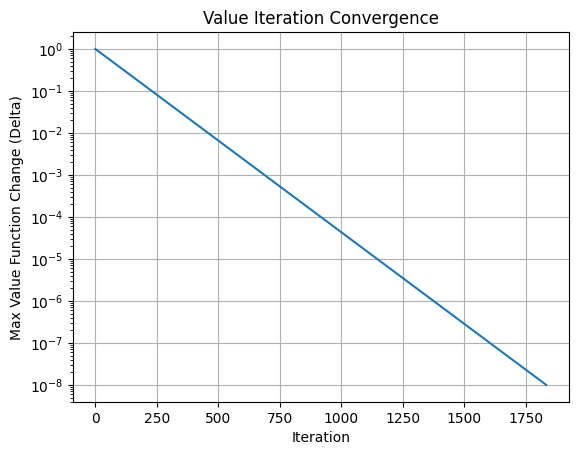

In [18]:
# Calcula a função Q ótima e obtém o histórico de erros
Q_star, errors = compute_mdp_optimal_q_function(s_states=S, a_actions=A, P_transitions=P, R_rewards=Rw, gamma_discount_factor=gamma, tolerance=1e-8, plot_graph=True)

---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state; 
* With this transition information (state, action, reward, next state), you can now perform an update. 
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Write you answer here